In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# # Reading dataset from the file 
data = pd.read_csv("IMDB Dataset.csv")

In [7]:
# getting some information about dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
# checking for the null values 
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
data.dtypes

review       object
sentiment    object
dtype: object

In [10]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
# convering the sentiments into the form of 0 and 1 [ 1-> positive , 0-> negative ]
sentiment_values_map = { 'positive' : 1 , 'negative' : 0 }
data['sentiment'] = data['sentiment'].map(sentiment_values_map)

In [12]:
# data after mapping the sentiment values
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [13]:
# Changing the datatype of the column
data['sentiment'] = data['sentiment'].astype('int')

In [14]:
data.dtypes 

review       object
sentiment     int64
dtype: object

In [15]:
# Getting the shape of data 
data.shape

(50000, 2)

In [16]:
# Here we can conclude that we have balanced dataset 
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

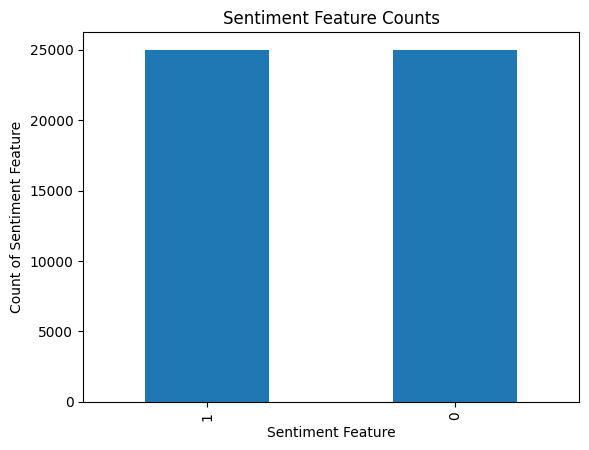

In [17]:
# Plotting the sentiment value counts
data['sentiment'].value_counts().plot(kind='bar')

# Setting the title and labels
plt.title('Sentiment Feature Counts')
plt.xlabel('Sentiment Feature')
plt.ylabel('Count of Sentiment Feature')

# Display the plot
plt.show()

### Conclusion 
#### By analysing above figure we can say the data is balanced

In [18]:
# Try to plot it using pie chart with sentiment features percentage 
sentiment_counts = data['sentiment'].value_counts()

In [19]:
sentiment_counts

sentiment
1    25000
0    25000
Name: count, dtype: int64

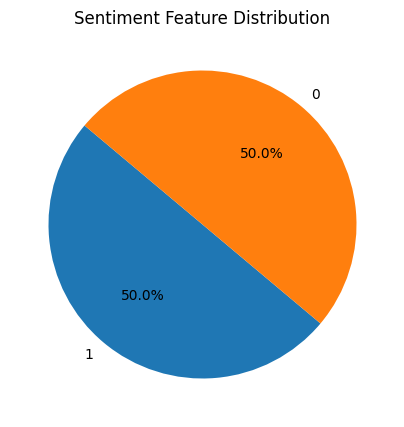

In [20]:
plt.figure(figsize=(5,5))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Setting the title and labels
plt.title('Sentiment Feature Distribution')
plt.ylabel('')  # Hide the y-label as it's not needed for pie chart

# Display the plot
plt.show()

## Conclusion 
#### By analysing the above figure we can say that there is 50 % negative reviews present in the dataset and 50 % positive reviews are present in the dataset

In [21]:
# Sample of the data here we can find out whether it is positive or negative
data['review'][9999]

"Smashing film about film-making. Shows the intense and strange relationships that can develop between directors & their actors; the manipulation and mind games; the preening egotism of performers. As in any workplace, sexuality complicates matters, but here to the nth degree as they are filming a sex scene.<br /><br />Absolutely fantastic performances from Gregoire Colin as the fragile, wannabe macho male lead, and - supremely - Anne Parillaud as the director's self-portrait. The image of her laughing & eating a banana at the end, having finally got what she wants out of her puppets, is pure delight."

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation and special characters
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    
    return clean_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# Taking sample review 
sample = data['review'][9999]

In [24]:
# Cleaning the text using clean_text function 
cleaned_example = clean_text(sample)

In [25]:
# data after cleaning 
cleaned_example

'smashing film show intense strange relationship develop director actor manipulation mind game preening egotism performer workplace sexuality complicates matter nth degree filming sex br br absolutely fantastic performance gregoire colin fragile wannabe macho male lead supremely anne parillaud director image laughing eating banana end finally got want puppet pure delight'

In [28]:
# Applying clean text function the sentiment column 
data['review'] = data['review'].apply(lambda x : clean_text(x))

In [29]:
# now we can see that we have all the clean text data under review column
data.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


In [30]:
# Transforming text data into TF-IDF features for machine learning with sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.review)

In [31]:
# Dependent variable (sentiments)
y

array([1, 1, 1, ..., 0, 0, 0])

In [32]:
# Independent variable (reviews)
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# Split the data into training and test sets with 50/50 distribution
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression CV model
model = LogisticRegressionCV(cv=5, random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict sentiments on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8955151515151515

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8208
           1       0.89      0.91      0.90      8292

    accuracy                           0.90     16500
   macro avg       0.90      0.90      0.90     16500
weighted avg       0.90      0.90      0.90     16500



In [35]:
# Pickle Files 
import pickle
pickle.dump(model,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [36]:
def predict_sentiment(review):
    
    # Transform the review into TF-IDF features
    review_tfidf = tfidf.transform([review])
    
    # Predict sentiment (positive or negative)
    prediction = model.predict(review_tfidf)[0]
    
    if prediction == 1 :
        return "Positive Review"
    else :
        return "Negative review"

In [37]:
# sample review 
review1 = data['review'][3]

In [38]:
# Getting prediction 
predict_sentiment(review1)

'Negative review'

In [39]:
# Testing another review 
review2 = data['review'][1]

In [40]:
# Getting prediction for review2
predict_sentiment(review2)

'Positive Review'

In [43]:
data[data["sentiment"] == 0 ].head()

,review,sentiment
3,basically family little boy jake think zombie ...,0
7,show amazing fresh innovative idea first aired...,0
8,encouraged positive comment film looking forwa...,0
10,phil alien one quirky film humour based around...,0
11,saw movie came recall scariest scene big bird ...,0


In [47]:
data['review'][10]

'phil alien one quirky film humour based around oddness everything rather actual br br first odd pretty funny movie progressed find joke oddness funny br br low budget film thats never problem pretty interesting character eventually lost br br imagine film would appeal stoner currently br br something similar better try brother another planet'

In [49]:
data['review'][78]

'scene actually attempt depiction revolutionary struggle resemble hirsute boy scout troop meandering tentatively swimming hole sharif please god palance try hand fiery oratory sound like kurtz swallowing bug display strategic brilliance incorporate map cuba replete smiling fishies ocean positively vaudevillian hypothesis bay pig came pas leave u one comical dentistry scene surfeit uppity hollywood peasant address camera though moving train kick passel homoeroticism limited castro manic unremitting never trust medved even busted clock right twice day historically awful movie'